In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
df = pd.read_csv("kidney_disease.csv")

In [3]:
df.shape

(400, 26)

## Exploratory Data Analysis

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [7]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
df['class'] = df['class'].replace({'ckd\t': 'ckd', 'notckd': 'notckd'})
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})
df['class']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [14]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [15]:
cat_cols, num_cols

(['red_blood_cells',
  'pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'hypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'peda_edema',
  'aanemia'],
 ['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'haemoglobin',
  'packed_cell_volume',
  'white_blood_cell_count',
  'red_blood_cell_count',
  'class'])

In [16]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [17]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

In [18]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'class']


In [19]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



In [20]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



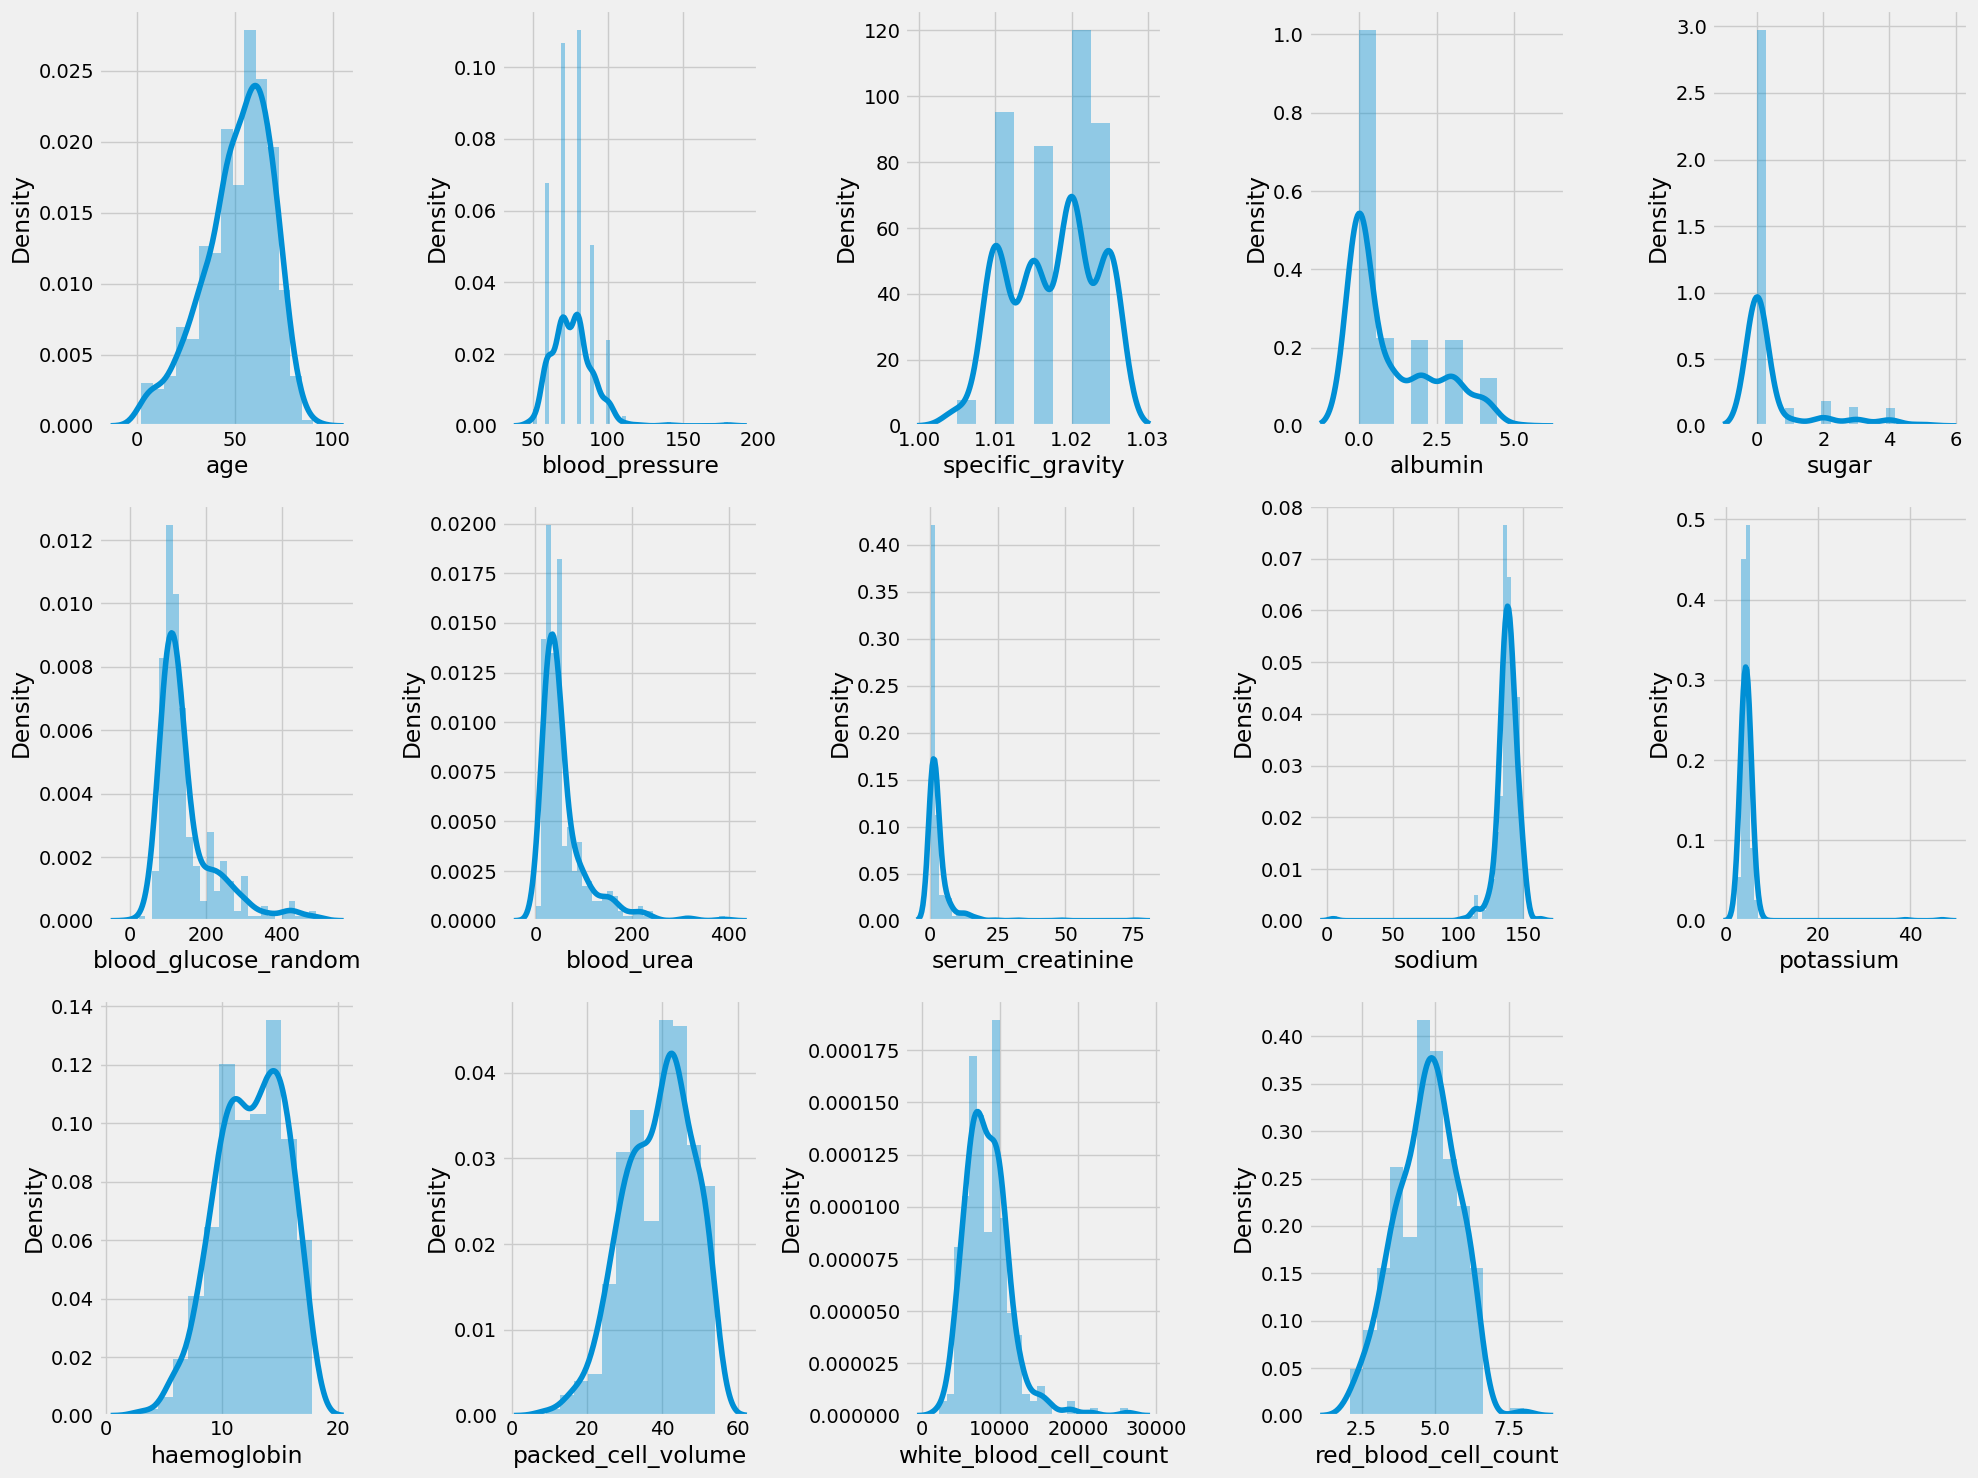

In [21]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

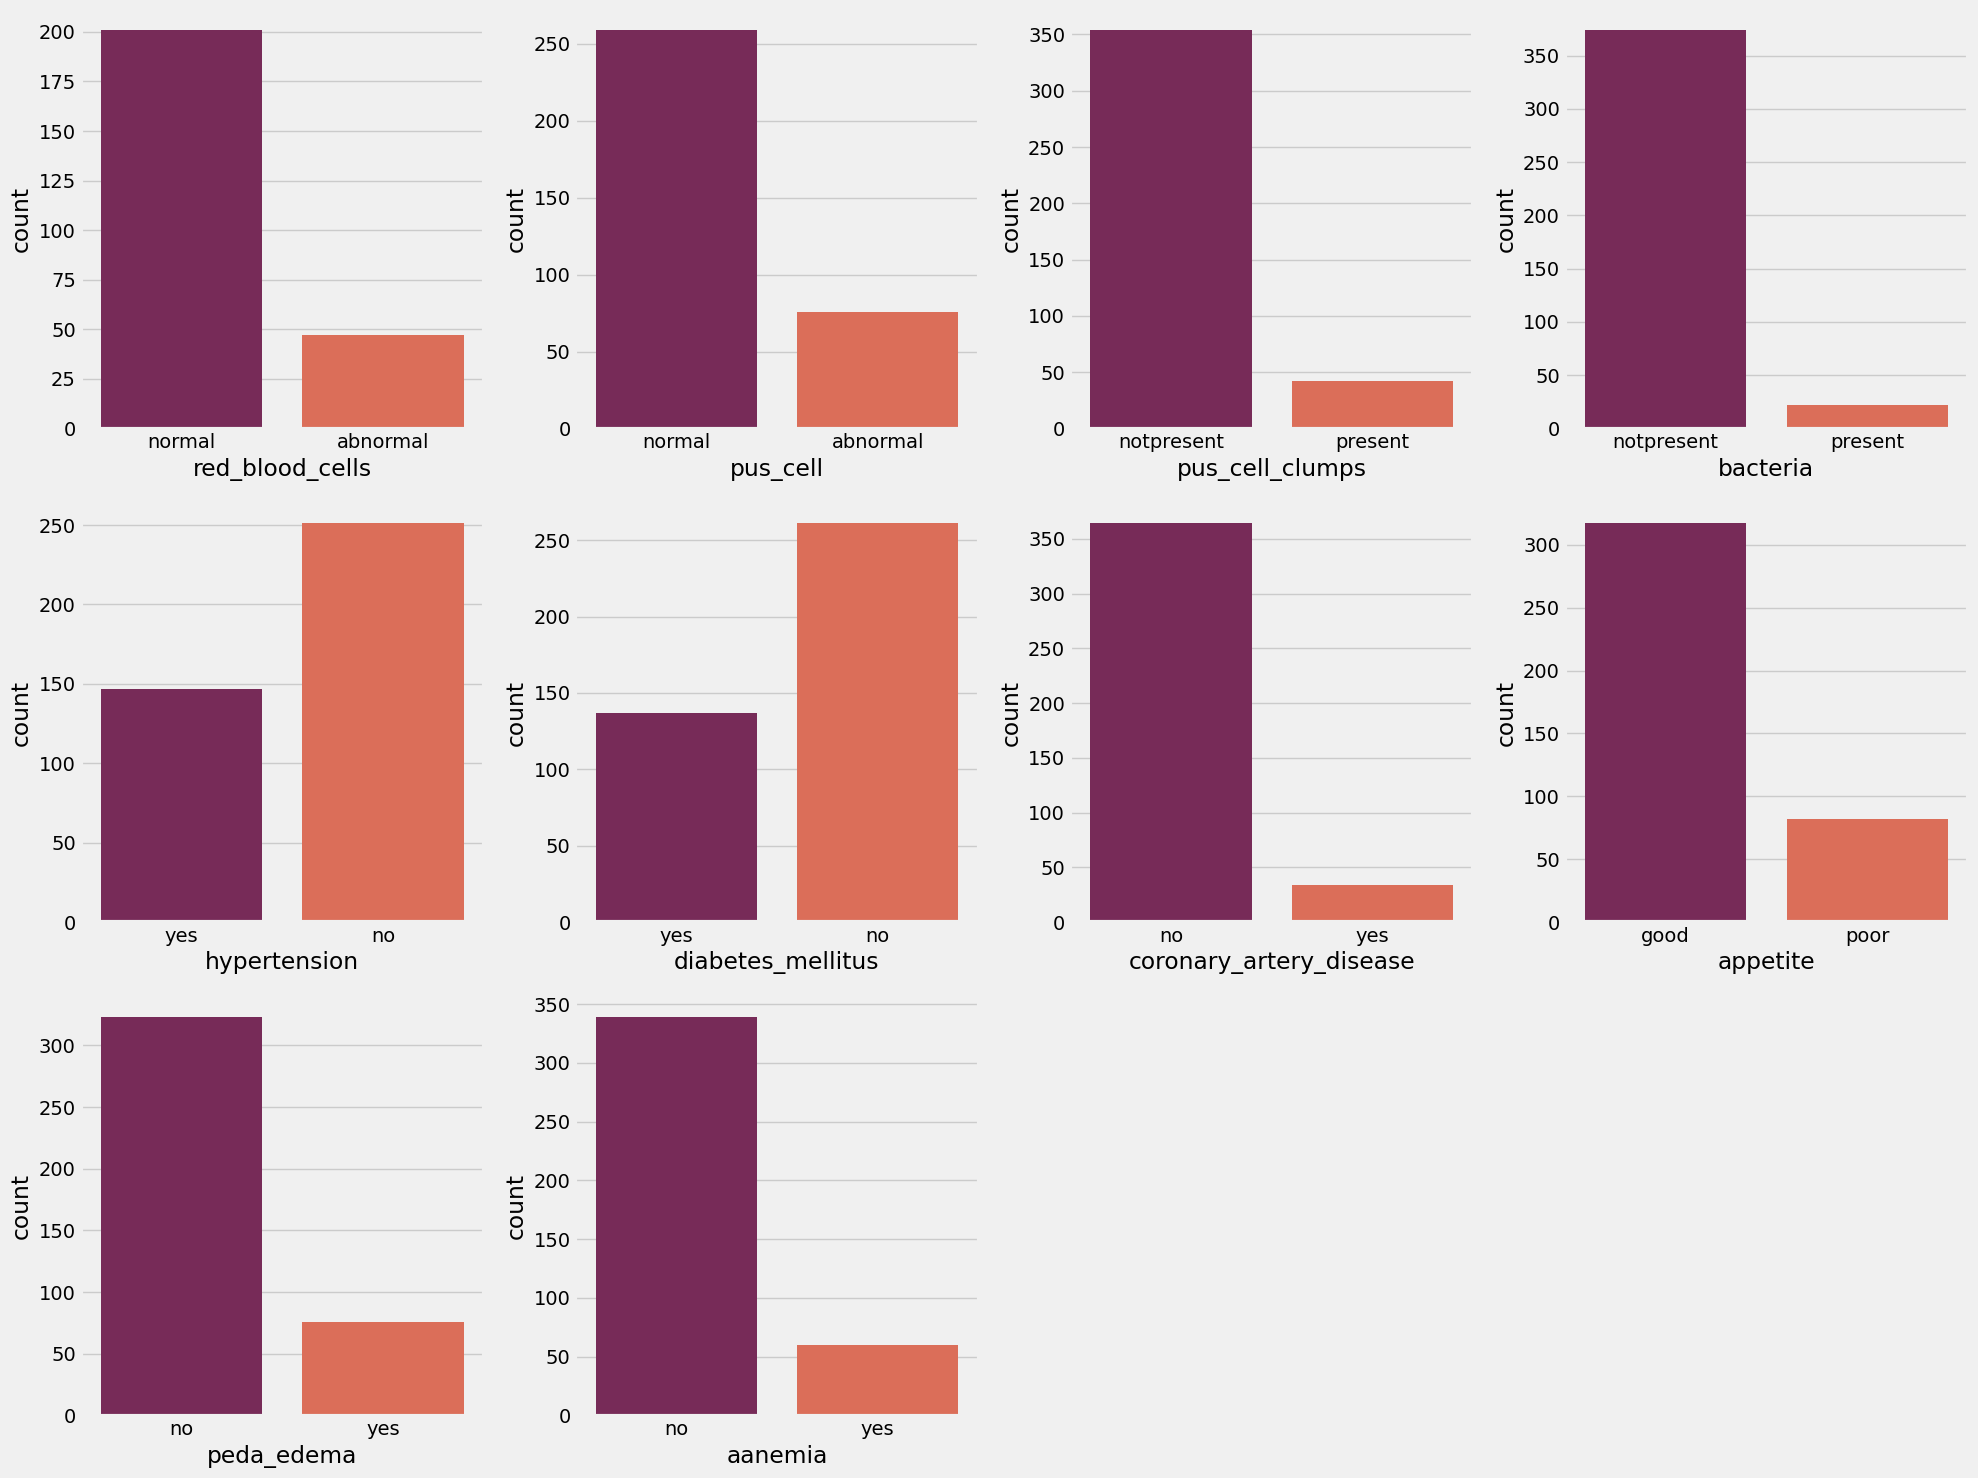

In [22]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[column], palette='rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

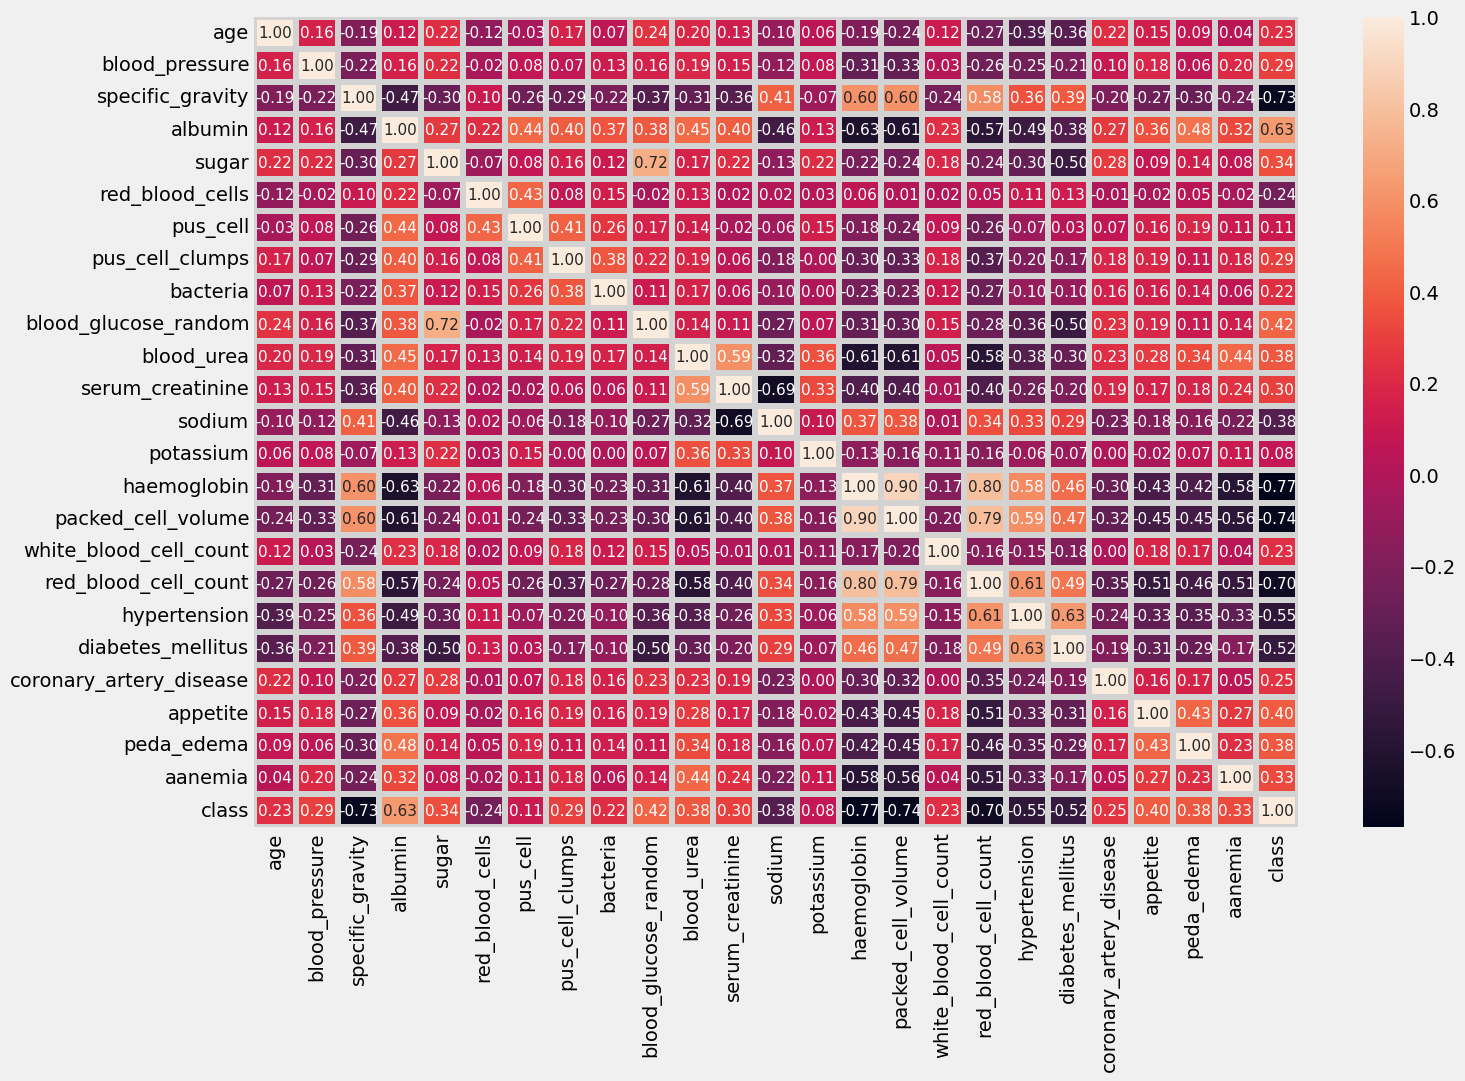

In [23]:
# heatmap of data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize = (15, 10))

# Convert categorical columns to numerical using pd.factorize before calculating correlation
numeric_df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)


sns.heatmap(numeric_df.corr(), annot = True,fmt=".2f", linewidths = 3,annot_kws={"size": 11}, linecolor = 'lightgrey')
plt.show()

In [24]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [25]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [26]:
violin('red_blood_cell_count')

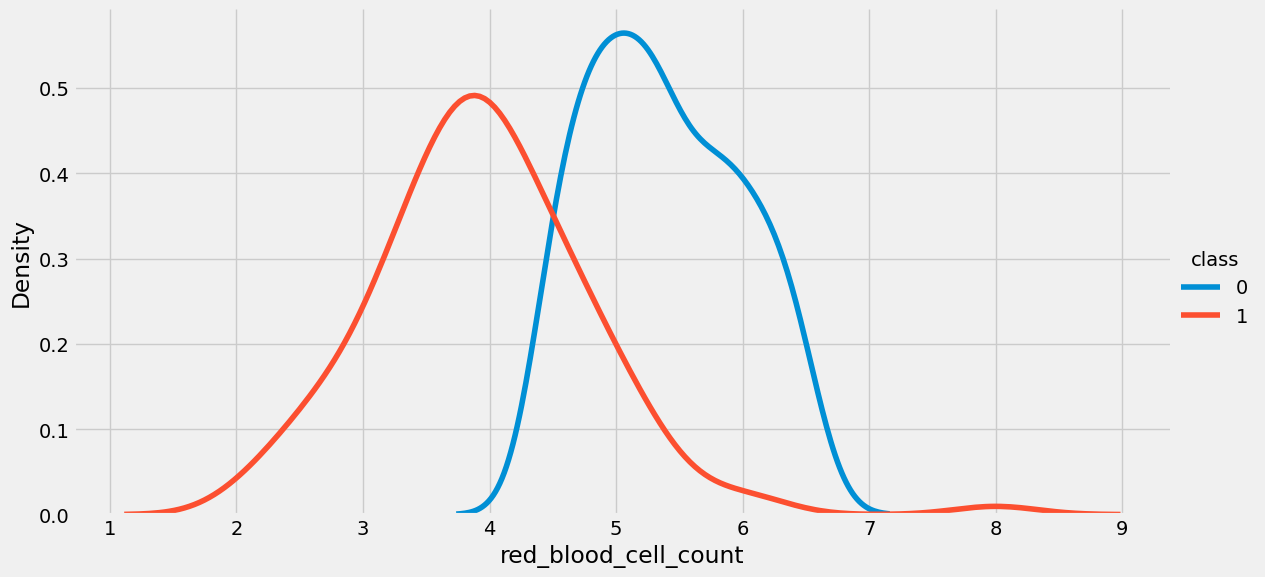

In [29]:
kde('red_blood_cell_count')

In [30]:
violin('white_blood_cell_count')

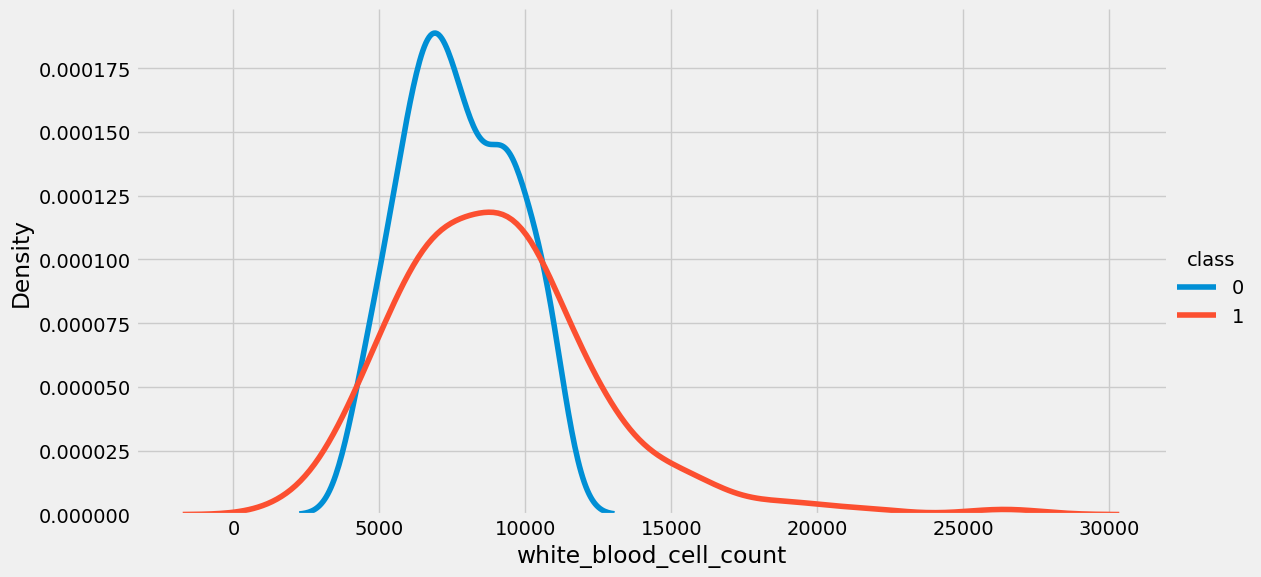

In [31]:
kde('white_blood_cell_count')

In [32]:
violin('packed_cell_volume')

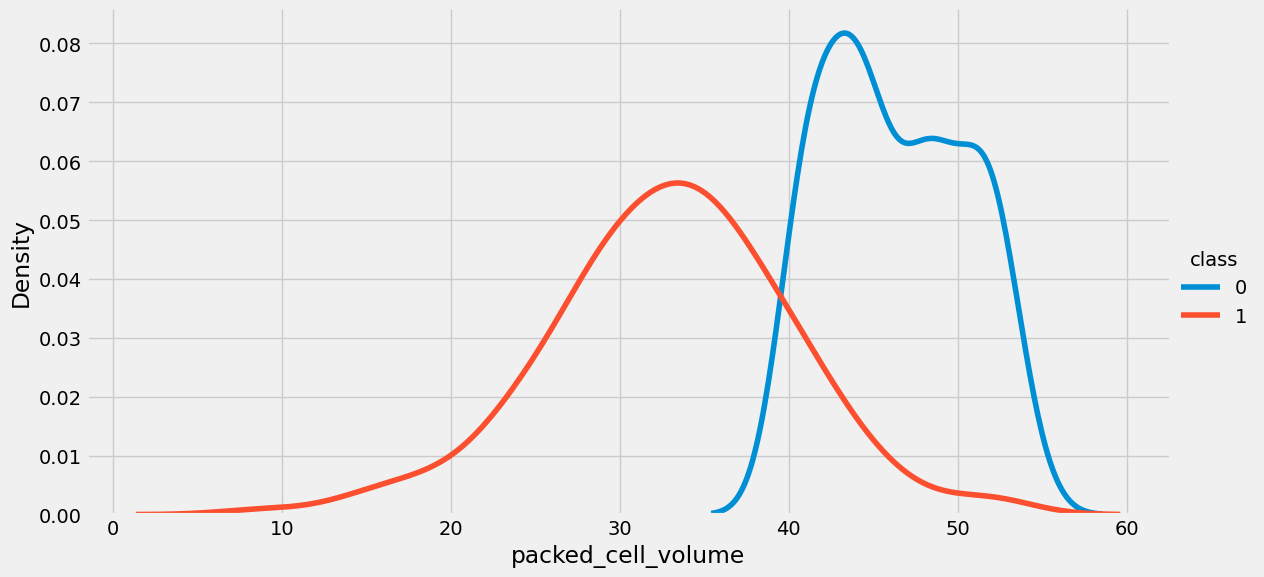

In [33]:
kde('packed_cell_volume')

In [34]:
violin('haemoglobin')

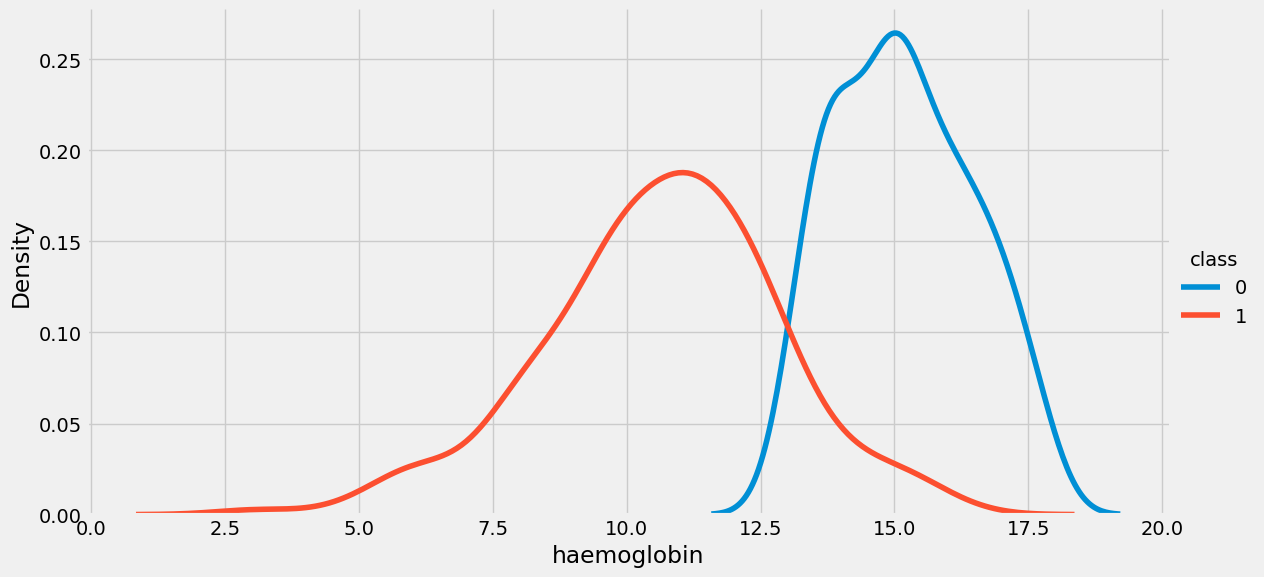

In [35]:
kde('haemoglobin')

In [36]:
violin('albumin')

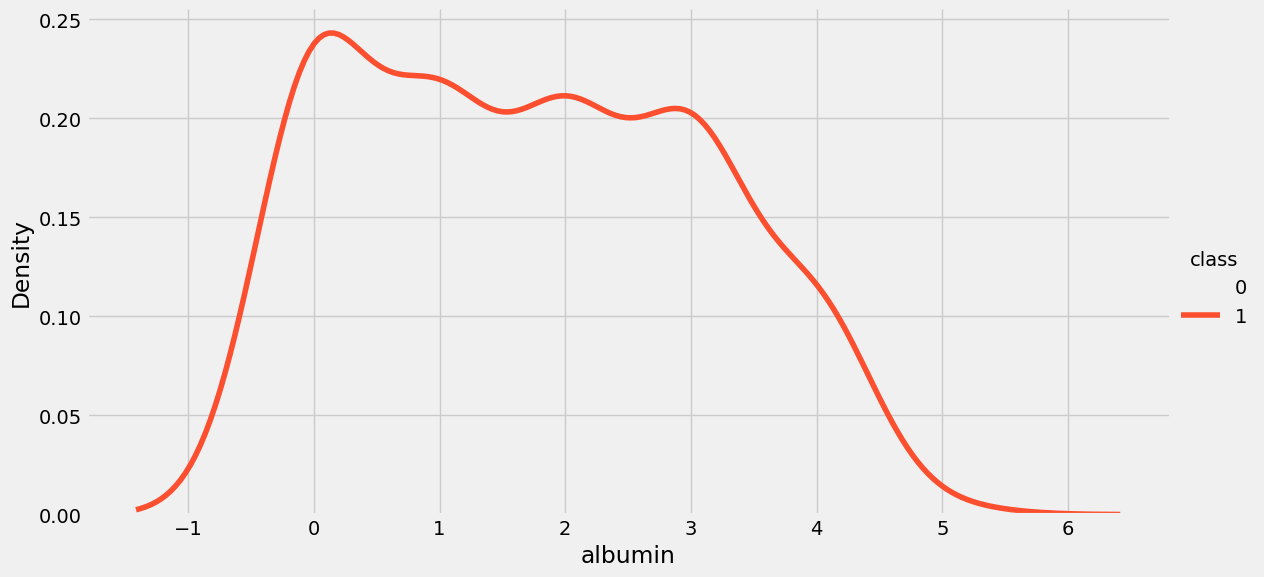

In [37]:
kde('albumin')

In [38]:
violin('blood_glucose_random')

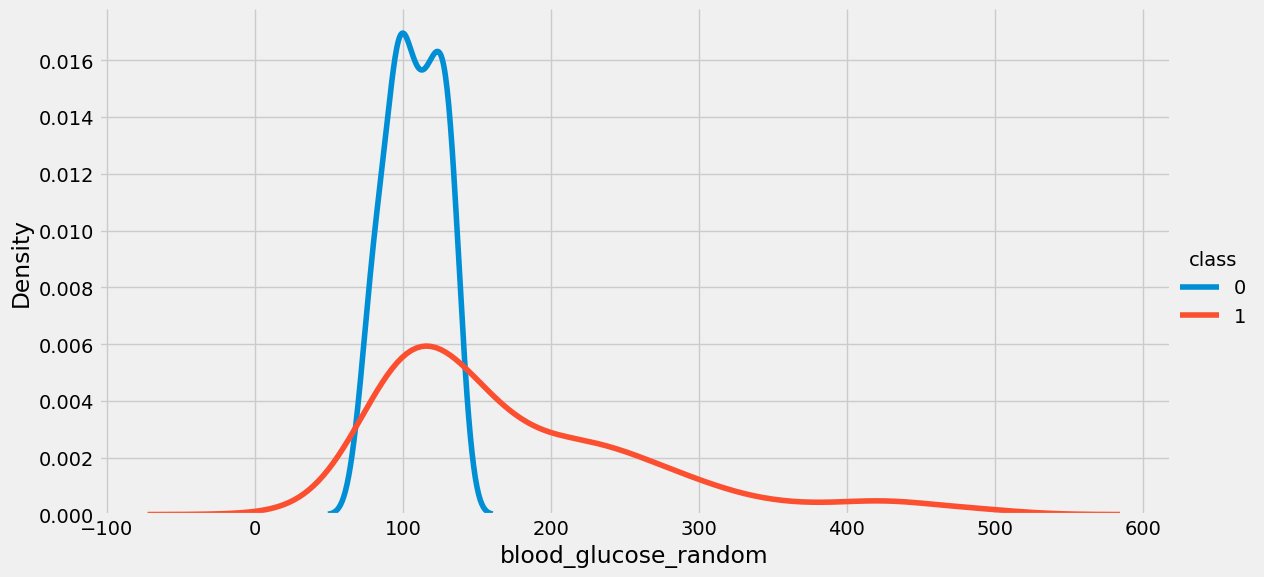

In [39]:
kde('blood_glucose_random')

In [40]:
violin('sodium')

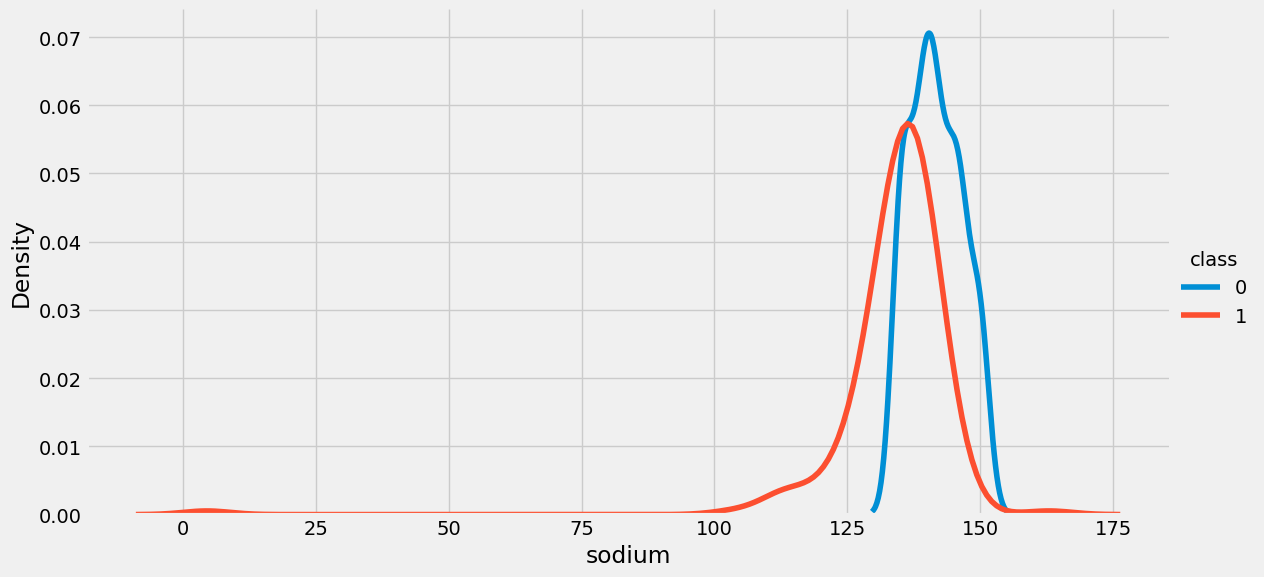

In [41]:
kde('sodium')

In [42]:
violin('blood_urea')

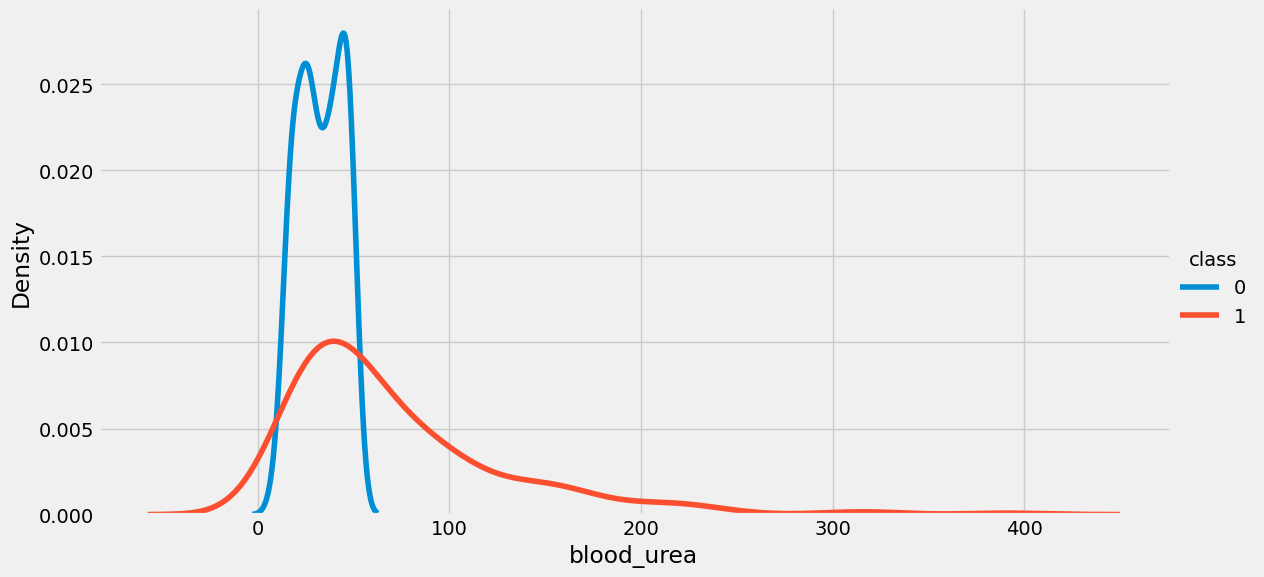

In [43]:
kde('blood_urea')

In [44]:
violin('specific_gravity')

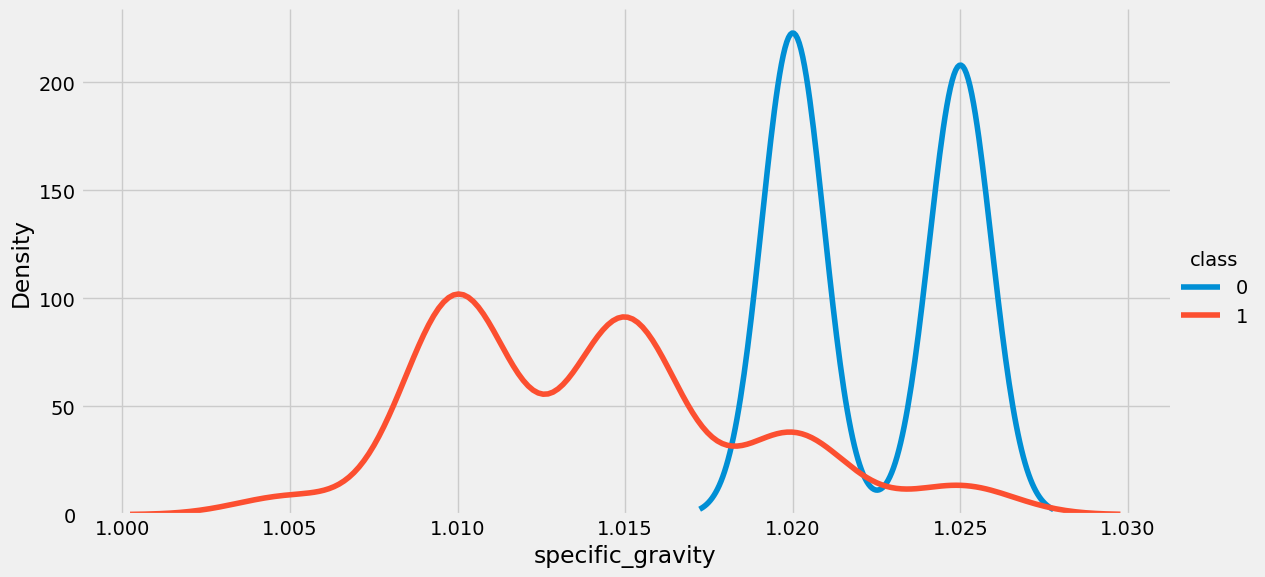

In [45]:
kde('specific_gravity')

In [46]:
scatter('haemoglobin', 'packed_cell_volume')

In [47]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [48]:
scatter('red_blood_cell_count', 'albumin')

In [49]:
scatter('sugar', 'blood_glucose_random')

In [50]:
scatter('packed_cell_volume','blood_urea')

In [51]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [52]:
px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [53]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [54]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [27]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute numerical NaNs with median
for col in num_cols:
    df[col] = df[col].astype(float).fillna(df[col].median())

In [28]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [29]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,0


In [30]:
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

In [32]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [33]:
# Assuming 'categorical_cols' contains the names of your categorical columns
df.dropna(subset=cat_cols, inplace=True)

In [34]:
for col in cat_cols:
    df[col].fillna('Unknown', inplace=True) # or 'Missing'

In [35]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [36]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [37]:
features = [
    'blood_urea', 'blood_glucose_random', 'aanemia', 'coronary_artery_disease',
    'pus_cell', 'red_blood_cell_count', 'diabetes_mellitus', 'peda_edema'
]

In [38]:
df[features]

,blood_urea,blood_glucose_random,aanemia,coronary_artery_disease,pus_cell,red_blood_cell_count,diabetes_mellitus,peda_edema
0,36.0,121.0,0,0,1,5.2,1,0
1,18.0,121.0,0,0,1,4.8,0,0
2,53.0,423.0,1,0,1,4.8,1,0
3,56.0,117.0,1,0,0,3.9,0,1
4,26.0,106.0,0,0,1,4.6,0,0
...,...,...,...,...,...,...,...,...
395,49.0,140.0,0,0,1,4.9,0,0
396,31.0,75.0,0,0,1,6.2,0,0
397,26.0,100.0,0,0,1,5.4,0,0
398,50.0,114.0,0,0,1,5.9,0,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[features]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
# Importing the important model building libraries
#type:ignore
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


2025-07-24 15:29:43.523923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-24 15:29:44.192350: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [41]:
# ANN model
model = Sequential()
model.add(Dense(64, activation = "relu", input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))

# Output layer
model.add(Dense(1, activation = "sigmoid"))

2025-07-24 15:29:46.399578: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-07-24 15:29:46.399618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: batman
2025-07-24 15:29:46.399627: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: batman
2025-07-24 15:29:46.399849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 570.133.7
2025-07-24 15:29:46.399877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 570.133.7
2025-07-24 15:29:46.399885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 570.133.7


In [42]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [43]:
history = model.fit(X_train_scaled, y_train, batch_size=32,  validation_split=0.2, epochs=50, verbose=0)

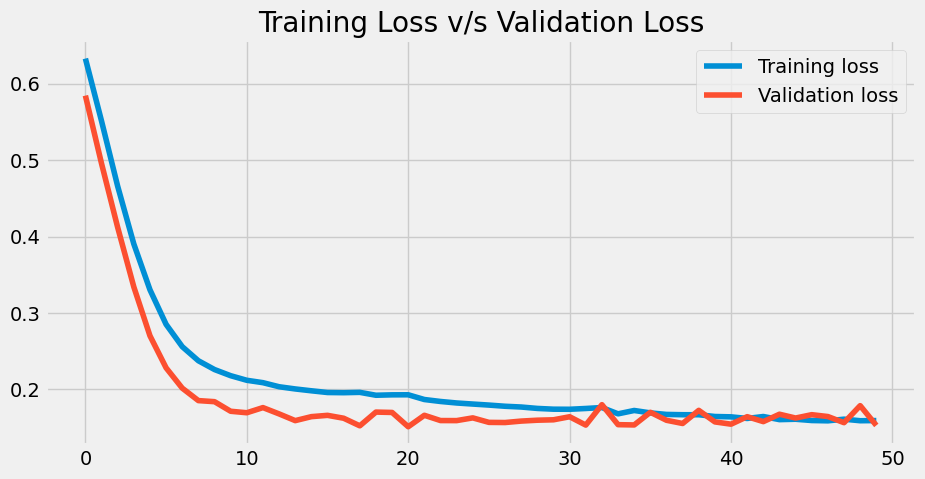

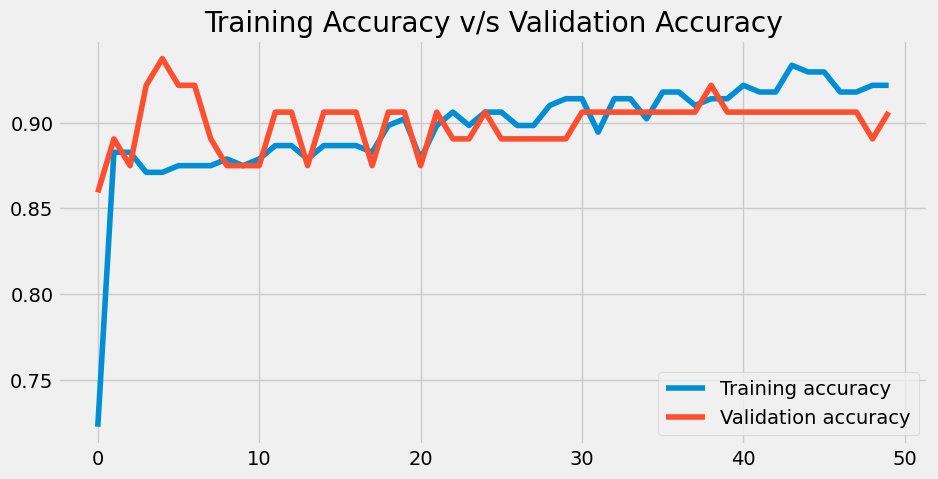

In [44]:
plt.figure(figsize=(10,5))
plt.title("Training Loss v/s Validation Loss")
plt.plot(history.history['loss'], label="Training loss");
plt.plot(history.history['val_loss'], label="Validation loss");
plt.legend()

plt.figure(figsize=(10,5))
plt.title("Training Accuracy v/s Validation Accuracy")
plt.plot(history.history['accuracy'], label="Training accuracy");
plt.plot(history.history['val_accuracy'], label="Validation accuracy");
plt.legend()

In [45]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred_random = random_forest_model.predict(X_test_scaled)
y_pred_random

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [47]:
decision_tree_model = DecisionTreeClassifier(max_depth=4, splitter="best", criterion="entropy")

In [48]:
decision_tree_model.fit(X_train_scaled, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
# y_pred_logistic = logistic_model.predict(X_test)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Comparing The Model

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results here
results = []

# Example models dictionary (use your actual trained models)
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Neural Network': model  # make sure ann_model.predict returns labels
}

for name, model in models.items():
    # For ANN, make sure to convert probability to class
    if name == 'Neural Network':
        y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()
    else:
        y_pred = model.predict(X_test_scaled)  # or X_test if you didn’t scale
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    results.append([name, acc, prec, rec, f1])

# Create DataFrame
metrics_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(metrics_df)


3/3 [==============================] - 0s 960us/step
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.8625   0.897959    0.88  0.888889
1        Decision Tree    0.8500   0.816667    0.98  0.890909
2        Random Forest    0.9375   0.941176    0.96  0.950495
3       Neural Network    0.9000   0.888889    0.96  0.923077


### Random sample prediction

In [52]:
# No CKD sample
non_ckd_sample = np.array([
   [15.0, 100.0, 0, 0,  # blood_urea, blood_glucose_random, aanemia, coronary_artery_disease
     0, 5.0, 0, 0]      # pus_cell, red_blood_cell_count, diabetes_mellitus, peda_edema
])
non_ckd_scaled = scaler.transform(non_ckd_sample)

print("\nPrediction for NON-CKD sample:")
ann_pred = model.predict(non_ckd_scaled)
print(f"ANN: {'High Chance of CKD' if ann_pred > 0.5 else 'Low Chance Of CKD'} ({ann_pred[0][0]:.4f})")

rf_pred = random_forest_model.predict(non_ckd_scaled)
print(f"RF: {'High Chance of CKD' if rf_pred[0] == 1 else 'Low Chance Of CKD'}")

dt_pred = decision_tree_model.predict(non_ckd_scaled)
print(f"DT: {'High Chance of CKD' if dt_pred[0] == 1 else 'Low Chance Of CKD'}")

log_pred = logistic_model.predict(non_ckd_scaled)
print(f"Log: {'High Chance of CKD' if log_pred[0] == 1 else 'Low Chance Of CKD'}")

# CKD sample
ckd_sample = np.array([
    [80.0, 200.0, 1, 1,  # blood_urea, blood_glucose_random, aanemia, coronary_artery_disease
     1, 3.0, 1, 1]       # pus_cell, red_blood_cell_count, diabetes_mellitus, peda_edema
])

ckd_scaled = scaler.transform(ckd_sample)

print("\nPrediction for CKD sample:")
ann_pred = model.predict(ckd_scaled)
print(f"ANN: {'High Chance of CKD' if ann_pred > 0.5 else 'Low Chance Of CKD'} ({ann_pred[0][0]:.4f})")

rf_pred = random_forest_model.predict(ckd_scaled)
print(f"RF: {'High Chance of CKD' if rf_pred[0] == 1 else 'Low Chance Of CKD'}")

dt_pred = decision_tree_model.predict(ckd_scaled)
print(f"DT: {'High Chance of CKD' if dt_pred[0] == 1 else 'Low Chance Of CKD'}")

log_pred = logistic_model.predict(ckd_scaled)
print(f"Log: {'High Chance of CKD' if log_pred[0] == 1 else 'Low Chance Of CKD'}")


Prediction for NON-CKD sample:
1/1 [==============================] - 0s 12ms/step
ANN: High Chance of CKD (0.9992)
RF: Low Chance Of CKD
DT: Low Chance Of CKD
Log: High Chance of CKD

Prediction for CKD sample:
1/1 [==============================] - 0s 12ms/step
ANN: High Chance of CKD (1.0000)
RF: High Chance of CKD
DT: High Chance of CKD
Log: High Chance of CKD
